Problem statement: Q Create a LBO model for buying Lodha Group (NSE: $LODHA) for $15B (current market cap ~$13.5B) and selling them for $20B after 5 years. Make assumptions (e.g. WACC) and document them.Once done.

Introduction to the report and LBO model that I am going to build, leverage buyout is simply a transaction of acquiring a buisness through leverage while deploying insignificant amount of personal asset 
while keeping the company itself as collateral, need not to mention it is double egded sword, I was looking on the web to find the relevant dataset, it would be downhill and easy going if I had one, but
fortunately I got to know about the Stock edge web application and the Macrotech Developers Ltd. basically being the shark in indian real estate market have got similarity with the above mentioned lodha
group, so I scraped the basic data from their financials and made dataframe out of it.

Note: this data might deviate little from the actual data that has been posted on their website because I had to perform neccessary data cleaning and transformation on top of it also all the numerical 
      values used in the dataset are in Cr INR.
      Total Income in the dataset is total revenue that company generates and PBIDT is profit before interest, depreciation and taxes,EBIDTA without amortization.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Extracting the data from excel csv that I have generated, you can find it in the repository, it has last 9 years of the most essential data of the company.

In [63]:
lodha = pd.read_csv('Lodha_10Y.csv')

In [64]:
lodha


,Year,Total Income,PBIDT,Consolidated Net Profit
0,1/3/2015,6658,1892,767
1,1/3/2016,8761,2670,672
2,1/3/2017,8526,2213,556
3,1/3/2018,9965,1967,773
4,1/3/2019,11979,3238,1639
5,1/3/2020,22809,2035,728
6,1/3/2021,6016,1706,40
7,1/3/2022,10612,2478,1202
8,1/3/2023,9332,2210,487
9,1/3/2024,9657,2505,1628


Let's take the mathematical overview of the dataset at glance which includes the following statiscal values

- Mean
- Max | Min
- Std deviation 
- percentile values

In [76]:
455 crores is of 8200 crores
lodha.describe()


,Total Income,PBIDT,Consolidated Net Profit
count,10.000000,10.00000,10.000000
mean,10431.500000,2291.40000,849.200000
std,4688.208121,447.93308,503.917277
min,6016.000000,1706.00000,40.000000
25%,8584.750000,1984.00000,585.000000
50%,9494.500000,2211.50000,747.500000
75%,10450.250000,2498.25000,1094.750000
max,22809.000000,3238.00000,1639.000000


1 INR is approximately equal to 0.0120606 USD
So, 849 crore INR is approximately equal to 1.0008 billion US dollars.

Average consolidated net profit of last 10 years comes out to be 849 Cr,
While total Income which is revenue essentially, being 10,431 Cr, Therefore, 
the percentage of average consolidated profit on avg total income is 8.14%.
and percentage of average consolidated profit on PBIDT is 38.3% .

Now lets try to figure out if there is any linear pattern between the earnings over the years

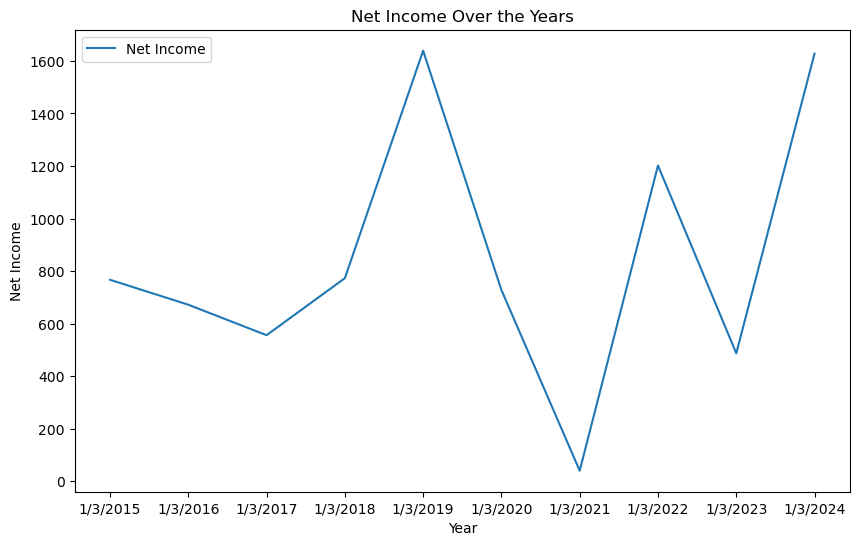

In [66]:
plt.figure(figsize=(10, 6))(Billion $)
plt.plot(lodha['Year'], lodha['Consolidated Net Profit'], label='Net Income')
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.title('Net Income Over the Years')
plt.legend()
plt.show()

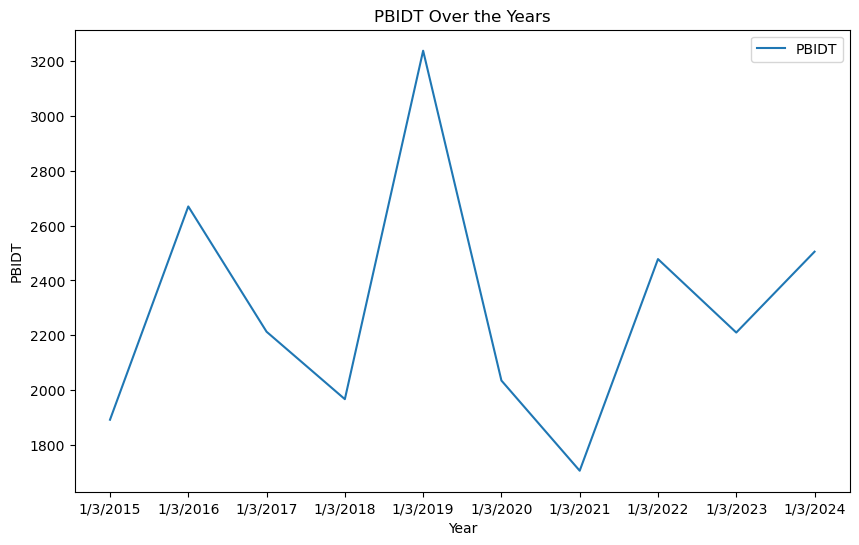

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(lodha['Year'], lodha['PBIDT'], label='PBIDT')
plt.xlabel('Year')
plt.ylabel('PBIDT')
plt.title('PBIDT Over the Years')
plt.legend()
plt.show()

I am not able to see any linear pattern, so I have to perform bivariate analysis to see any pattern

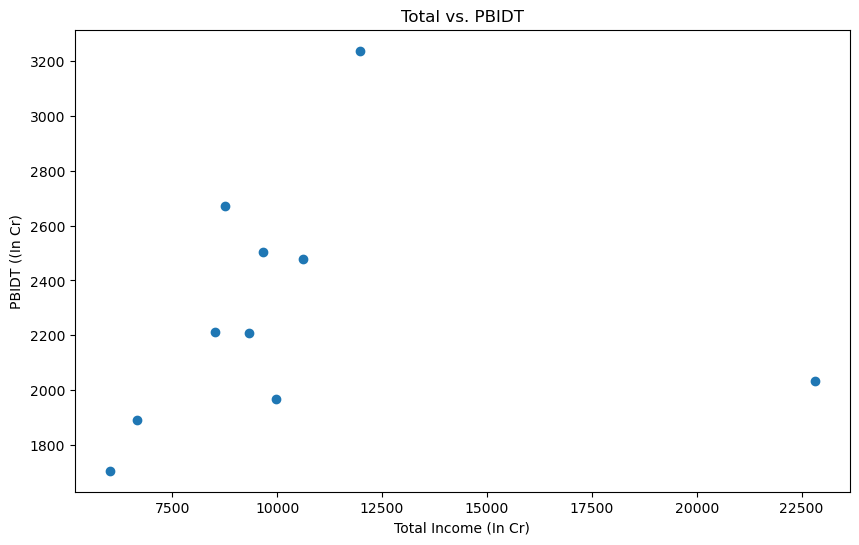

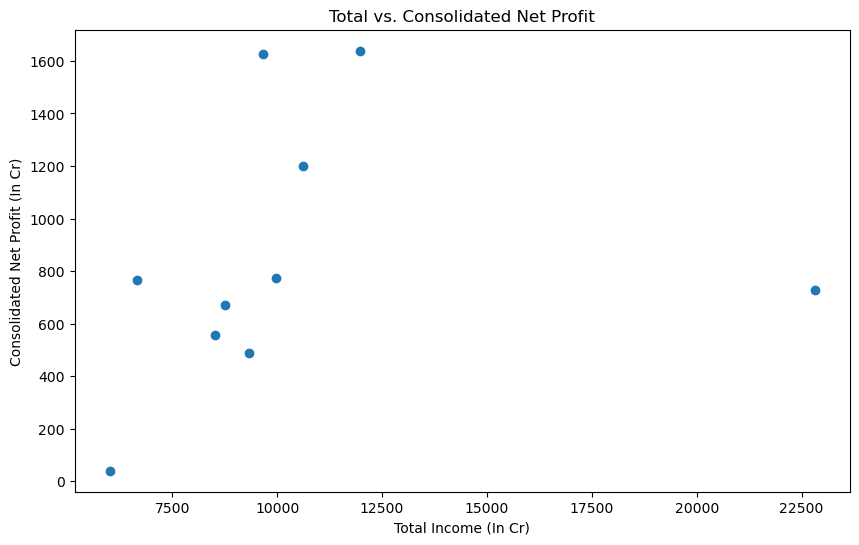

In [75]:
# Scatter plot for Total vs. PBIDT
plt.figure(figsize=(10, 6))
plt.scatter(lodha['Total Income'], lodha['PBIDT'])
plt.xlabel('Total Income (In Cr)')
plt.ylabel('PBIDT ((In Cr)')
plt.title('Total vs. PBIDT')
plt.show()

# Scatter plot for Total vs. Consolidated Net Profit
plt.figure(figsize=(10, 6))
plt.scatter(lodha['Total Income'], lodha['Consolidated Net Profit'])
plt.xlabel('Total Income (In Cr)')
plt.ylabel('Consolidated Net Profit (In Cr)')
plt.title('Total vs. Consolidated Net Profit')
plt.show()
455 crores is of 8200 crores

Unfortunately scatter plots are also not helpful to find patterns, and now it is safe to say 
that company is not following any trends and showing very irregular patterns which isn't the
idel scenario to invest your funds especially for short span of 5 years but I will still con-
tinue my analysis.

Now consider this data frame where 14 billion dollar is taken as debt @10% interest rate for 5 years.
Values are in crore INR

In [79]:
# Correctly defining the DataFrame
debt_df = pd.DataFrame({
    'debt': [114000],
    'interest': [11400], 
    'PBIDT': [2291] 
})

In [80]:
debt_df

,debt,interest,PBIDT
0,114000,11400,2291


Interest that we have got to pay for 5 years 

In [82]:
interest_5y = debt_df['interest'] * 5
interest_5y

0    57000
Name: interest, dtype: int64

Here I have take take average PBIDT value and did aggregate sum on it for 5 years

In [84]:
PBIDT_5y = debt_df['PBIDT'] * 5
PBIDT_5y

0    11455
Name: PBIDT, dtype: int64

Total loan amount that we have to pay after 5 years 

In [85]:
debt_total = 114000 + interest_5y
debt_total



0    171000
Name: interest, dtype: int64

After 5 years it has been assumed in the question that we will take exit at the value of 20 billion dollar which is fairly high values and unrealistic too
considering the financials of the comapany, but let's do the calculation

20 billion dollar in indian rupees would be


 -   Assume an exchange rate of 1 USD = 82 INR (this rate may vary based on the current market conditions).
 -   Convert $20 billion to Indian rupees: $20 billion = $20,000,000,000 $20,000,000,000 × 82 INR/USD = 1,640,000,000,000 INR
 -   Convert the Indian rupee amount to crores: 1 crore = 10,000,000 INR 1,640,000,000,000 INR ÷ 10,000,000 = 164,000 crores
 -   Round off the result to the nearest crore: 164,000 crores ≈ 164,000 crores (since it's already a whole number)


In [87]:
Profit_before_taxtation_after_5y =  PBIDT_5y - interest_5y
Profit_before_taxtation_after_5y

0   -45545
dtype: int64

Now if the company is sold at the price of 20 billion dollar
we have initially deployed 1 billion dollar and took debt of 
14 billion dollar 

In [89]:
Net_income_on_initial_capital_deployed = 164000 + Profit_before_taxtation_after_5y - debt_df['debt']
Net_income_on_initial_capital_deployed

0    4455
dtype: int64

So after 5 years on 1 billion capital deployment we will be able to generate 4455 cr 
which is also going to be the IRR for us although it has not been calculated using the 
right formula because I was fettered with limited amount of time and resources but to 
sum up:


To calculate percentage return on capital deployed - 1 billion dollar (8400 cr), we can use the following formula:

Percentage = (Value / Total) × 100

Where:
Value = 4455 crores
Total = 8200 crores

Substituting the values, we get:

Percentage = (4455 / 8200) × 100
            = 0.543292683 × 100
            = 54.33%

Therefore, 4455 crores is approximately 54.33% of 8200 crores.

To verify the calculation:
54.33% of 8200 crores = 0.5433 × 8200 crores
                       = 4455.06 crores ≈ 4455 crores

So, 4455 crores is approximately 54.33% of 8200 crores.


*54.33%* is the answer that I am able to infer from the above calculation.


Thanks for providing me with the opportunity to do this assignment.
